In [4]:
import pandas as pd
from dfply import *
from plotnine import *
from plotnine.themes import theme
from plotnine.facets import facet_wrap

import warnings
warnings.filterwarnings(action="ignore")

In [15]:
Happy=pd.read_csv("../data/Happiness.csv")

In [20]:
Happy['H_Score'].groupby('year').head()

KeyError: 'year'

In [18]:
Happy["H_Score"].groupby(Happy["Region","year"])

KeyError: ('Region', 'year')

In [16]:
Happy.shape

(468, 12)

In [32]:
Happy.dtypes

Country        object
DR            float64
Economy       float64
Family        float64
Freedom       float64
Generosity    float64
H_Rank          int64
H_Score       float64
Health        float64
Region         object
Trust         float64
year            int64
dtype: object

# 문제 1. dfply 이용하기


### 1.1 Region 별 개수를 구하시오.¶


In [11]:
Happy["Region"].value_counts(ascending=True)

North America                        6
Australia and New Zealand            6
Eastern Asia                        16
Southern Asia                       21
Southeastern Asia                   26
Middle East and Northern Africa     58
Western Europe                      63
Latin America and Caribbean         68
Central and Eastern Europe          87
Sub-Saharan Africa                 117
Name: Region, dtype: int64

In [12]:
Happy["Region"].value_counts(ascending=False)

Sub-Saharan Africa                 117
Central and Eastern Europe          87
Latin America and Caribbean         68
Western Europe                      63
Middle East and Northern Africa     58
Southeastern Asia                   26
Southern Asia                       21
Eastern Asia                        16
Australia and New Zealand            6
North America                        6
Name: Region, dtype: int64

In [13]:
Happy["Region"].value_counts(ascending=False, normalize=True)

Sub-Saharan Africa                 0.250000
Central and Eastern Europe         0.185897
Latin America and Caribbean        0.145299
Western Europe                     0.134615
Middle East and Northern Africa    0.123932
Southeastern Asia                  0.055556
Southern Asia                      0.044872
Eastern Asia                       0.034188
Australia and New Zealand          0.012821
North America                      0.012821
Name: Region, dtype: float64

### 1.3 Region별 정부 평균신뢰도를 구하고 가장작은 3곳을 출력하시오.¶


In [14]:
Happy.groupby("Region")

In [31]:
Happy.groupby(["Region"]).mean()["Trust"].sort_values(ascending=True).head()

Region
Central and Eastern Europe     0.084788
Southern Asia                  0.103500
Latin America and Caribbean    0.103720
Eastern Asia                   0.109937
Sub-Saharan Africa             0.114975
Name: Trust, dtype: float64

### 1.4 South Korea의 2016년 행복지수와 순위를 구하시오.


In [34]:
Happy[(Happy["Country"]=="South Korea") & (Happy["year"]== 2016)][["Country","H_Rank","H_Score"]]

,Country,H_Rank,H_Score
215,South Korea,57,5.835


### 1.5 Country별 3개년 H_Score 합산 상위 5개국을 출력하시오.


In [37]:
Happy.groupby("Country").sum()["H_Score"].sort_values(ascending=False).head()

Country
Switzerland    22.590
Denmark        22.575
Iceland        22.566
Norway         22.557
Finland        22.288
Name: H_Score, dtype: float64

### 1.6. 2015년에 비해 행복지수 순위가 가장 높아진 국가 상위5개를 출력하시오.


In [51]:
Happy.groupby(["Country","year"])["H_Rank"]

In [53]:
(Happy.groupby(["Country","year"])["H_Rank"])

,0,1
0,"(Afghanistan, 2015)","152 153 Name: H_Rank, dtype: int64"
1,"(Afghanistan, 2016)","311 154 Name: H_Rank, dtype: int64"
2,"(Afghanistan, 2017)","453 141 Name: H_Rank, dtype: int64"
3,"(Albania, 2015)","94 95 Name: H_Rank, dtype: int64"
4,"(Albania, 2016)","266 109 Name: H_Rank, dtype: int64"
...,...,...
463,"(Zambia, 2016)","263 106 Name: H_Rank, dtype: int64"
464,"(Zambia, 2017)","428 116 Name: H_Rank, dtype: int64"
465,"(Zimbabwe, 2015)","114 115 Name: H_Rank, dtype: int64"
466,"(Zimbabwe, 2016)","288 131 Name: H_Rank, dtype: int64"


In [57]:
H_2015=Happy[Happy["year"]== 2015][["Country","H_Rank"]]

In [58]:
H_2017=Happy[Happy["year"]== 2017][["Country","H_Rank"]]

In [61]:
solve=pd.merge(H_2015,H_2017, on="Country",how="inner")

In [69]:
solve["H_diff"]=solve["H_Rank_y"]-solve["H_Rank_x"]

In [70]:
solve

,Country,H_Rank_x,H_Rank_y,H_diff
0,Switzerland,1,4,3
1,Iceland,2,3,1
2,Denmark,3,2,-1
3,Norway,4,1,-3
4,Canada,5,7,2
...,...,...,...,...
144,Rwanda,154,151,-3
145,Benin,155,143,-12
146,Syria,156,152,-4
147,Burundi,157,154,-3


In [74]:
solve.sort_values(by="H_diff",ascending=True).head()

,Country,H_Rank_x,H_Rank_y,H_diff
84,Latvia,89,54,-35
126,Egypt,135,104,-31
96,Hungary,104,75,-29
125,Bulgaria,134,105,-29
81,Romania,86,57,-29


### 1.7. 2015년에 비해 행복지수 순위가 가장 떨어진 국가 상위 5개를 출력하시오.


In [75]:
solve.sort_values(by="H_diff",ascending=False).head()

,Country,H_Rank_x,H_Rank_y,H_diff
21,Venezuela,23,82,59
91,Lesotho,97,139,42
108,Liberia,116,148,32
80,Zambia,85,116,31
111,Haiti,119,145,26


### 1.8 year, Region 별 H_Score 평균과 분산을 구하시오.


In [83]:
Happy.groupby(["Region","year"]).mean()["H_Score"].head()

Region                      year
Australia and New Zealand   2015    7.285000
                            2016    7.323500
                            2017    7.299000
Central and Eastern Europe  2015    5.332931
                            2016    5.370690
Name: H_Score, dtype: float64

In [84]:
Happy.groupby(["Region","year"]).var()["H_Score"].head()

Region                      year
Australia and New Zealand   2015    0.000002
                            2016    0.000220
                            2017    0.000450
Central and Eastern Europe  2015    0.325408
                            2016    0.348567
Name: H_Score, dtype: float64

In [93]:
Happy.groupby(["year","Region"]).describe()["H_Score"][["mean","std"]].head()

mean       std
year Region                                             
2015 Australia and New Zealand        7.285000  0.001414
     Central and Eastern Europe       5.332931  0.570446
     Eastern Asia                     5.626167  0.554053
     Latin America and Caribbean      6.144682  0.728560
     Middle East and Northern Africa  5.406900  1.101382

### 1.9 2017년에 Family가 H_Score에 차지하는 비율이 가장 높은 국가 3곳


In [95]:
Happy["ratio"]=Happy["Family"]/Happy["H_Score"]


In [99]:
Happy[Happy["year"]==2017][["Country","ratio"]].sort_values(by="ratio",ascending=False).head()

,Country,ratio
444,Ukraine,0.340463
454,Botswana,0.324364
451,Lesotho,0.312525
465,Tanzania,0.311135
439,Mali,0.305841


# 문제 2. plotnine 이용하기


In [100]:
Happy = pd.read_csv("../data/Happiness.csv")
Happy.head()

,Country,DR,Economy,Family,Freedom,Generosity,H_Rank,H_Score,Health,Region,Trust,year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,0.32957,2015


In [103]:
from plotnine import *

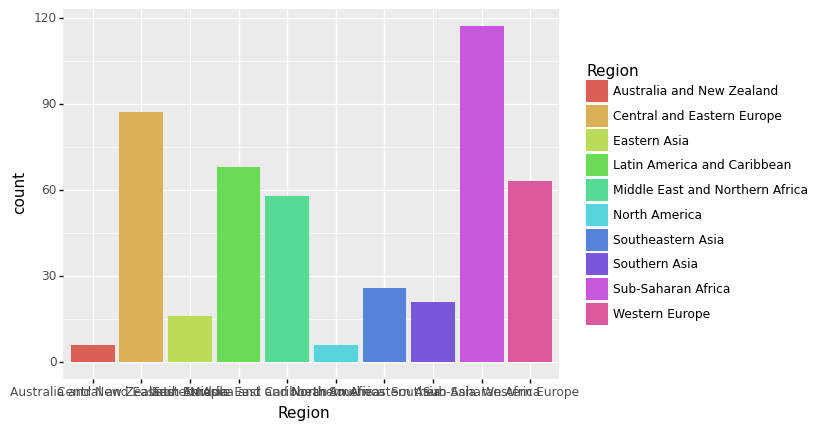

<ggplot: (122371840877)>

In [109]:
(ggplot(Happy,aes(x="Region", fill="Region")) + geom_bar(stat="count"))

In [110]:
from plotnine.themes import theme
theme(axis_text_x=element_text(angle=45)

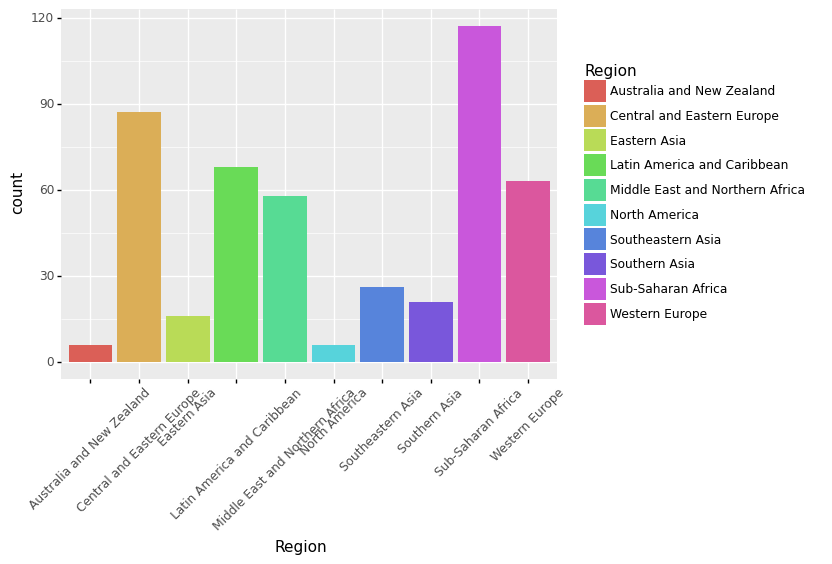

<ggplot: (122371840862)>

In [112]:
(ggplot(Happy,aes(x="Region", fill="Region")) + geom_bar(stat="count")+theme(axis_text_x=element_text(angle=45)))

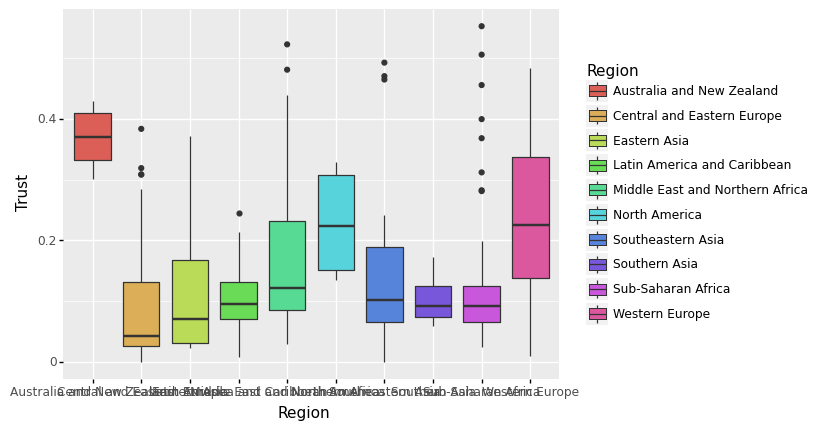

<ggplot: (122369526324)>

In [119]:
(ggplot(Happy,aes("Region","Trust", fill="Region")) + geom_boxplot())

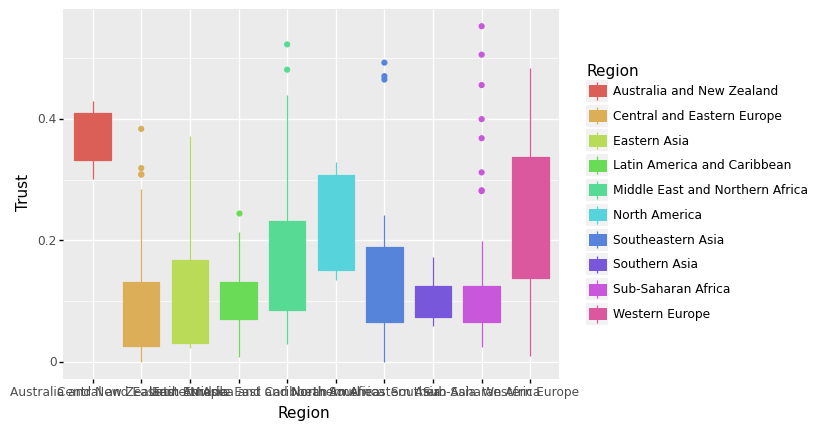

<ggplot: (122372946240)>

In [120]:
(ggplot(Happy,aes("Region","Trust", fill="Region",color="Region")) + geom_boxplot())


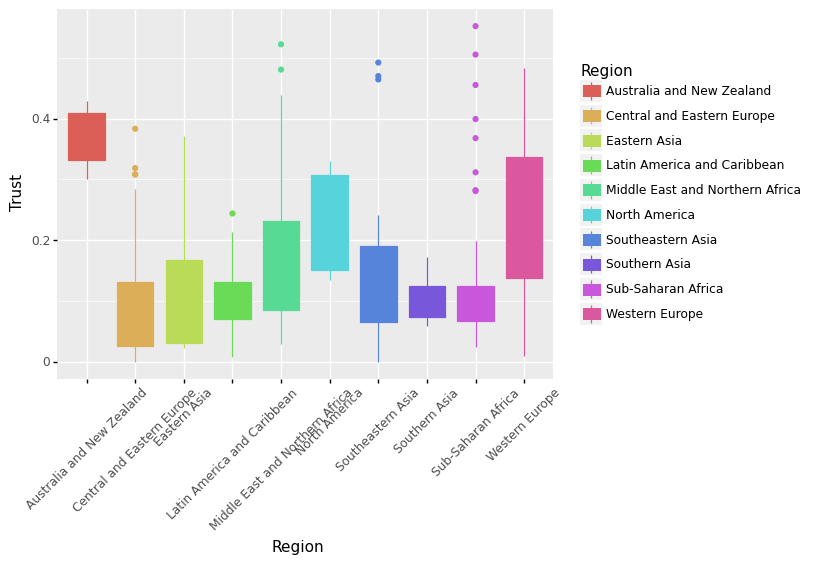

<ggplot: (122375102067)>

In [123]:
(ggplot(Happy,aes("Region","Trust", fill="Region",color="Region")) + geom_boxplot()+
 theme(axis_text_x=element_text(angle=45)))


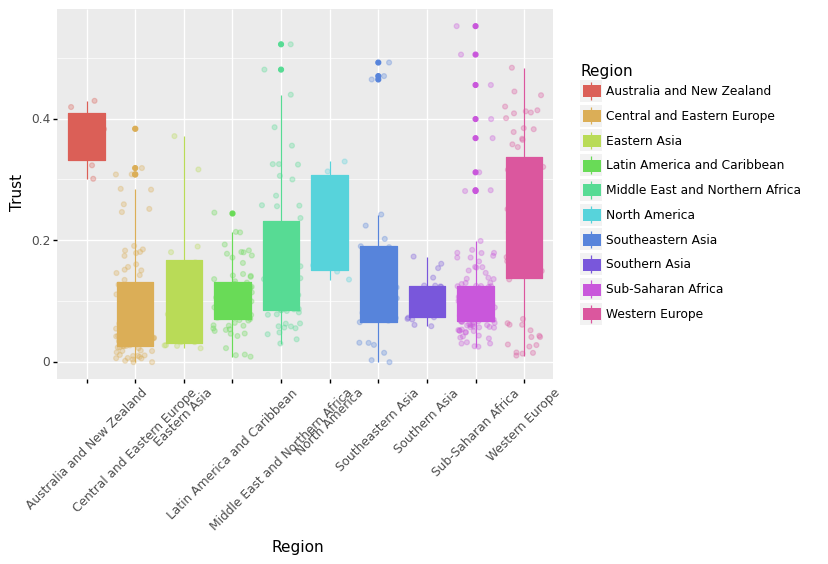

<ggplot: (122375398554)>

In [124]:
(ggplot(Happy,aes("Region","Trust", fill="Region",color="Region")) + geom_boxplot()+
 theme(axis_text_x=element_text(angle=45))+geom_jitter(alpha=0.3))


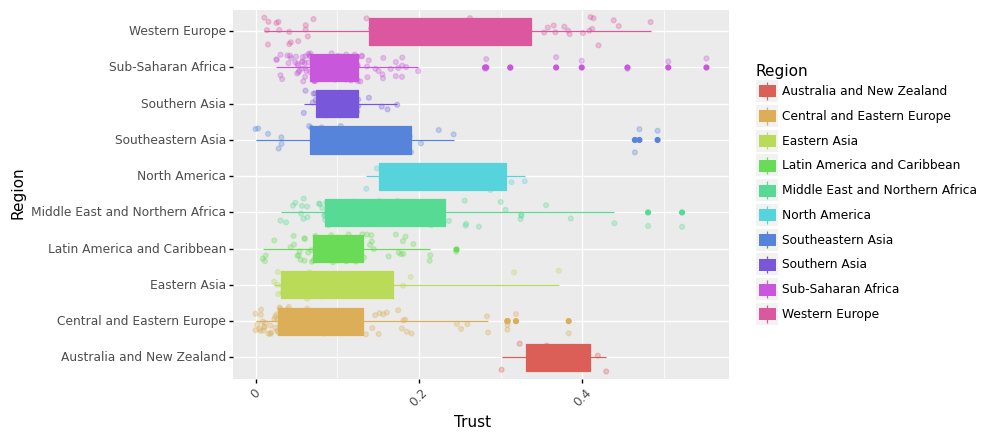

<ggplot: (122375396783)>

In [125]:
(ggplot(Happy,aes("Region","Trust", fill="Region",color="Region")) + geom_boxplot()+
 theme(axis_text_x=element_text(angle=45))+geom_jitter(alpha=0.3)) + coord_flip()

### 2.3 2017년 기준 상위 10개국에서 H_Score에 영향을 주는 요인들 비중을 그리시오.


In [7]:
top10=Happy[Happy["year"]==2017].sort_values(by="H_Rank").iloc[:10]

In [8]:
top10

,Country,DR,Economy,Family,Freedom,Generosity,H_Rank,H_Score,Health,Region,Trust,year
315,Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,Western Europe,0.315964,2017
316,Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,Western Europe,0.400770,2017
317,Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,Western Europe,0.153527,2017
318,Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,Western Europe,0.367007,2017
319,Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,Western Europe,0.382612,2017
320,Netherlands,2.294804,1.503945,1.428939,0.585384,0.470490,6,7.377,0.810696,Western Europe,0.282662,2017
321,Canada,2.187264,1.479204,1.481349,0.611101,0.435540,7,7.316,0.834558,North America,0.287372,2017
322,New Zealand,2.046456,1.405706,1.548195,0.614062,0.500005,8,7.314,0.816760,Australia and New Zealand,0.382817,2017
323,Sweden,2.097538,1.494387,1.478162,0.612924,0.385399,9,7.284,0.830875,Western Europe,0.384399,2017
324,Australia,2.065211,1.484415,1.510042,0.601607,0.477699,10,7.284,0.843887,Australia and New Zealand,0.301184,2017


In [9]:
# for i in list(top10.columns[top10.dtypes == "float64"]):
#     top10[i]=top10[i]/top10["H_Score"]
# top10.iloc[:,]

In [32]:
l_col=top10.columns.tolist()

In [36]:
l_col

['Country',
 'DR',
 'Economy',
 'Family',
 'Freedom',
 'Generosity',
 'H_Rank',
 'H_Score',
 'Health',
 'Region',
 'Trust',
 'year']

In [37]:
a=(top10.dtypes == "float64").tolist()

In [38]:
print(a)

[False, True, True, True, True, True, False, True, True, False, True, False]


In [34]:
l_col[a]

TypeError: list indices must be integers or slices, not list

In [ ]:
bool_li=[]
lambda x: if x in     

In [12]:
top10.iloc[:,[0,1,2,3,4,5,-4,-2]].stack().unstack(level=-1)

,Country,DR,Economy,Family,Freedom,Generosity,Health,Trust
315,Norway,2.27703,1.61646,1.53352,0.635423,0.362012,0.796667,0.315964
316,Denmark,2.31371,1.48238,1.55112,0.626007,0.35528,0.792566,0.40077
317,Iceland,2.32272,1.48063,1.61057,0.627163,0.47554,0.833552,0.153527
318,Switzerland,2.27672,1.56498,1.51691,0.620071,0.290549,0.858131,0.367007
319,Finland,2.43018,1.44357,1.54025,0.617951,0.245483,0.809158,0.382612
320,Netherlands,2.2948,1.50394,1.42894,0.585384,0.47049,0.810696,0.282662
321,Canada,2.18726,1.4792,1.48135,0.611101,0.43554,0.834558,0.287372
322,New Zealand,2.04646,1.40571,1.5482,0.614062,0.500005,0.81676,0.382817
323,Sweden,2.09754,1.49439,1.47816,0.612924,0.385399,0.830875,0.384399
324,Australia,2.06521,1.48441,1.51004,0.601607,0.477699,0.843887,0.301184


In [13]:
top10.iloc[:,[0,1,2,3,4,5,-4,-2]].stack().unstack(level=0)

,315,316,317,318,319,320,321,322,323,324
Country,Norway,Denmark,Iceland,Switzerland,Finland,Netherlands,Canada,New Zealand,Sweden,Australia
DR,2.27703,2.31371,2.32272,2.27672,2.43018,2.2948,2.18726,2.04646,2.09754,2.06521
Economy,1.61646,1.48238,1.48063,1.56498,1.44357,1.50394,1.4792,1.40571,1.49439,1.48441
Family,1.53352,1.55112,1.61057,1.51691,1.54025,1.42894,1.48135,1.5482,1.47816,1.51004
Freedom,0.635423,0.626007,0.627163,0.620071,0.617951,0.585384,0.611101,0.614062,0.612924,0.601607
Generosity,0.362012,0.35528,0.47554,0.290549,0.245483,0.47049,0.43554,0.500005,0.385399,0.477699
Health,0.796667,0.792566,0.833552,0.858131,0.809158,0.810696,0.834558,0.81676,0.830875,0.843887
Trust,0.315964,0.40077,0.153527,0.367007,0.382612,0.282662,0.287372,0.382817,0.384399,0.301184


In [141]:
melting=pd.melt(top10.iloc[:,[0,1,2,3,4,5,-4,-2]],id_vars=['Country'])

In [142]:
melting

,Country,variable,value
0,Norway,DR,2.277027
1,Denmark,DR,2.313707
2,Iceland,DR,2.322715
3,Switzerland,DR,2.276716
4,Finland,DR,2.430182
...,...,...,...
65,Netherlands,Trust,0.282662
66,Canada,Trust,0.287372
67,New Zealand,Trust,0.382817
68,Sweden,Trust,0.384399


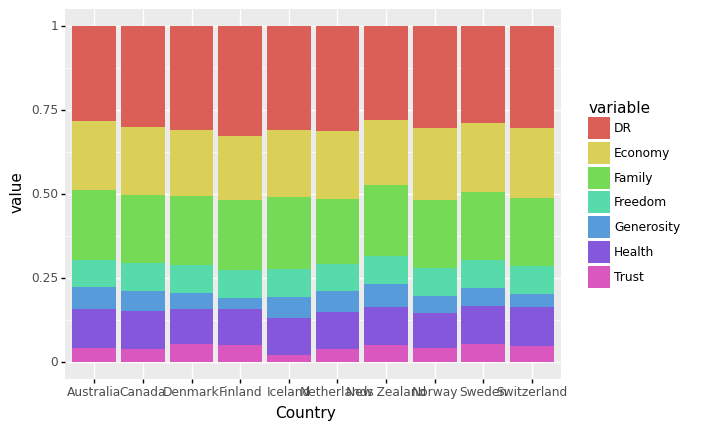

<ggplot: (153178668201)>

In [148]:
(ggplot(melting,aes("Country","value",fill="variable"))+geom_bar(stat='identity',position="fill"))

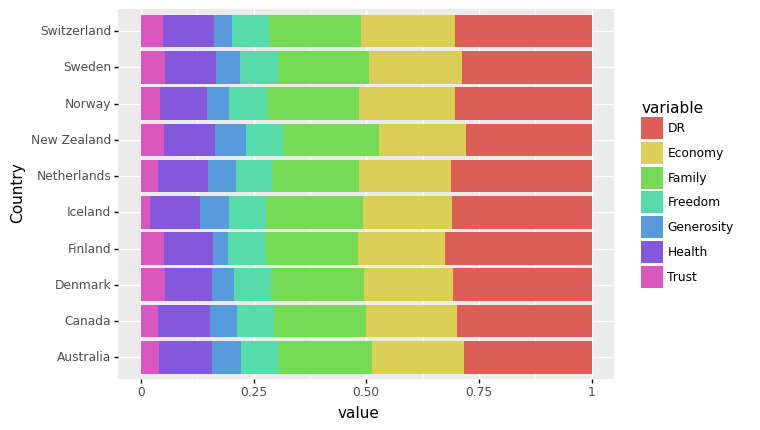

<ggplot: (153178665713)>

In [149]:
(ggplot(melting,aes("Country","value",fill="variable"))+geom_bar(stat='identity',position="fill"))+coord_flip()

In [156]:
EA=Happy[Happy["Region"]=="Eastern Asia"]
EA.head()

,Country,DR,Economy,Family,Freedom,Generosity,H_Rank,H_Score,Health,Region,Trust,year
37,Taiwan,2.32323,1.29098,1.07617,0.39740,0.25376,38,6.298,0.87530,Eastern Asia,0.08129,2015
45,Japan,1.68435,1.27074,1.25712,0.49615,0.10705,46,5.987,0.99111,Eastern Asia,0.18060,2015
46,South Korea,2.21978,1.24461,0.95774,0.33208,0.18557,47,5.984,0.96538,Eastern Asia,0.07857,2015
71,Hong Kong,0.65429,1.38604,1.05818,0.59608,0.39478,72,5.474,1.01328,Eastern Asia,0.37124,2015
83,China,1.86040,0.89012,0.94675,0.51697,0.08185,84,5.140,0.81658,Eastern Asia,0.02781,2015


In [159]:
melting=pd.melt(EA.iloc[:,[0,1,2,3,4,5,-4,-2,-1]],id_vars=['year','Country'])
melting.head()

,year,Country,variable,value
0,2015,Taiwan,DR,2.32323
1,2015,Japan,DR,1.68435
2,2015,South Korea,DR,2.21978
3,2015,Hong Kong,DR,0.65429
4,2015,China,DR,1.86040


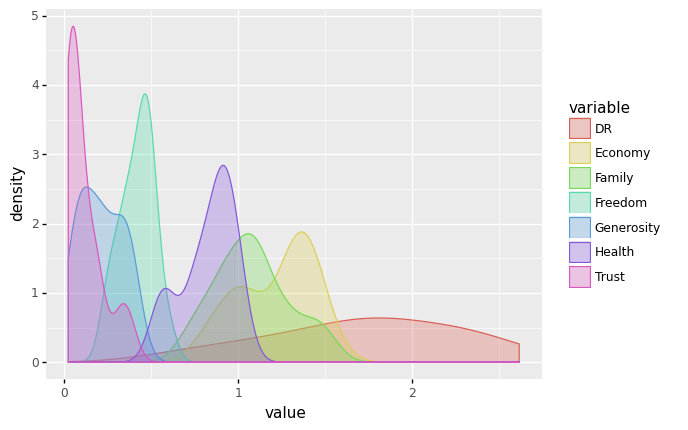

<ggplot: (153175248463)>

In [163]:
(ggplot(melting,aes("value",fill="variable",color="variable"))+ geom_density(alpha=.3))

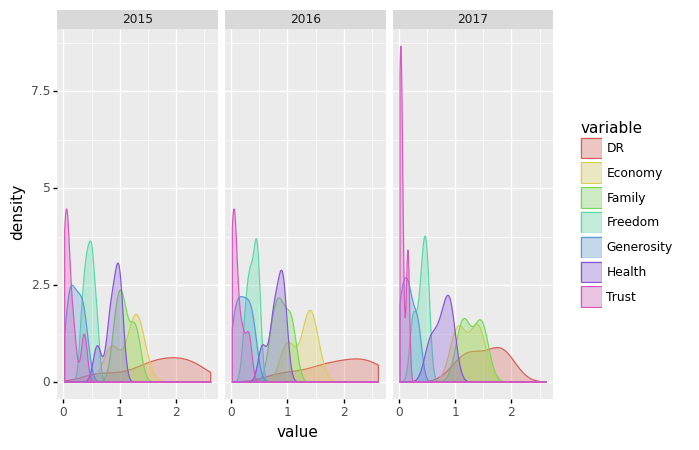

<ggplot: (153176128368)>

In [164]:
(ggplot(melting,aes("value",fill="variable",color="variable"))+ geom_density(alpha=.3))+facet_wrap("year")

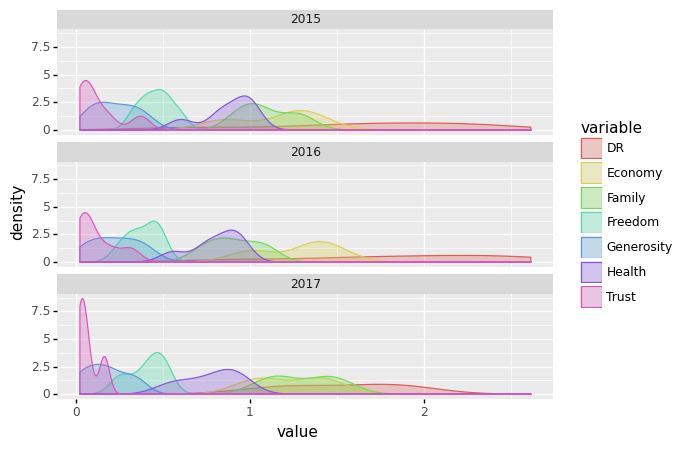

<ggplot: (153181092214)>

In [167]:
(ggplot(melting,aes("value",fill="variable",color="variable"))+ geom_density(alpha=.3))+facet_wrap("year",nrow=3)

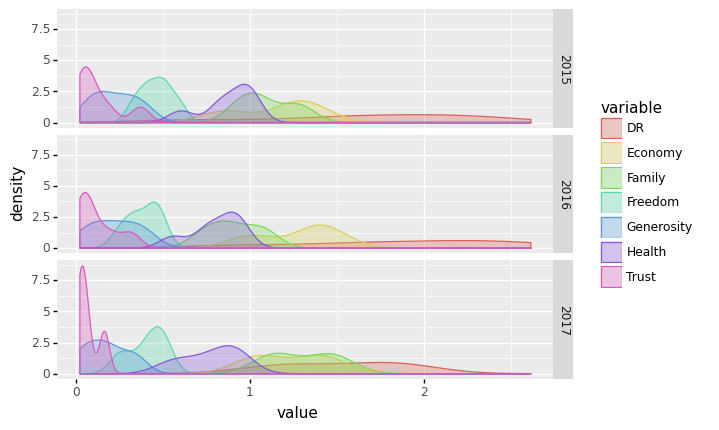

<ggplot: (153178064990)>

In [170]:
(ggplot(melting,aes("value",fill="variable",color="variable"))+ geom_density(alpha=.3))+facet_grid("year~")

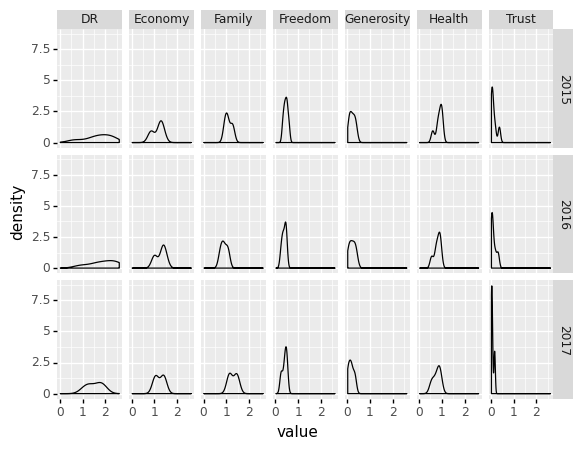

<ggplot: (153177867677)>

In [171]:
(ggplot(melting,aes("value"))+ geom_density(alpha=.3))+facet_grid("year~variable")

In [ ]:
# df.select_dtypes(include=['number'])
# train_df.describe(include=['O']) 